In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [274]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [275]:
churn_data.drop(labels='RowNumber', axis=1, inplace=True)

In [276]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Задание 9.1 ###
---

In [277]:
# Добавляем столбец с текстовым описанием типа клиента
churn_data['Exited_txt'] = churn_data['Exited'].apply(lambda x: 'Ушедший клиент' if x == 1 else 'Лояльный клиент')

In [278]:
# Сгруппируем клиентов по типу и посчитаем количество
churn_data_pie = churn_data.groupby('Exited_txt')['Exited'].count()

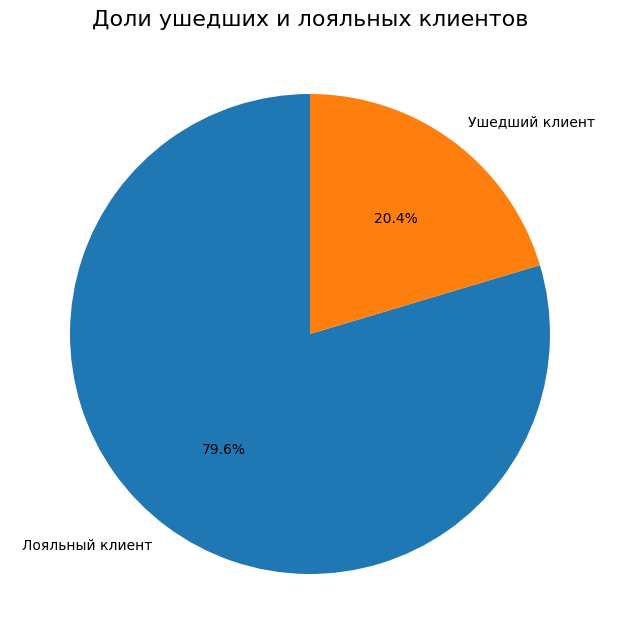

In [279]:
# Строим график типа pie
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(
    churn_data_pie,
    labels=churn_data_pie.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Доли ушедших и лояльных клиентов', fontsize=16)
plt.show(pie)

**Вывод:** на графике видно, что в банке преобладает доля лояльных клиентов, которая составляет 79,6%.  
Доля ушедших для банка клиентов составляет всего 20,4%.

### Задание 9.2 ###
---

In [280]:
# Отбираем пользователей, у которых на счету больше 2 500 долларов.
churn_data_balance = churn_data[churn_data['Balance'] > 2500]

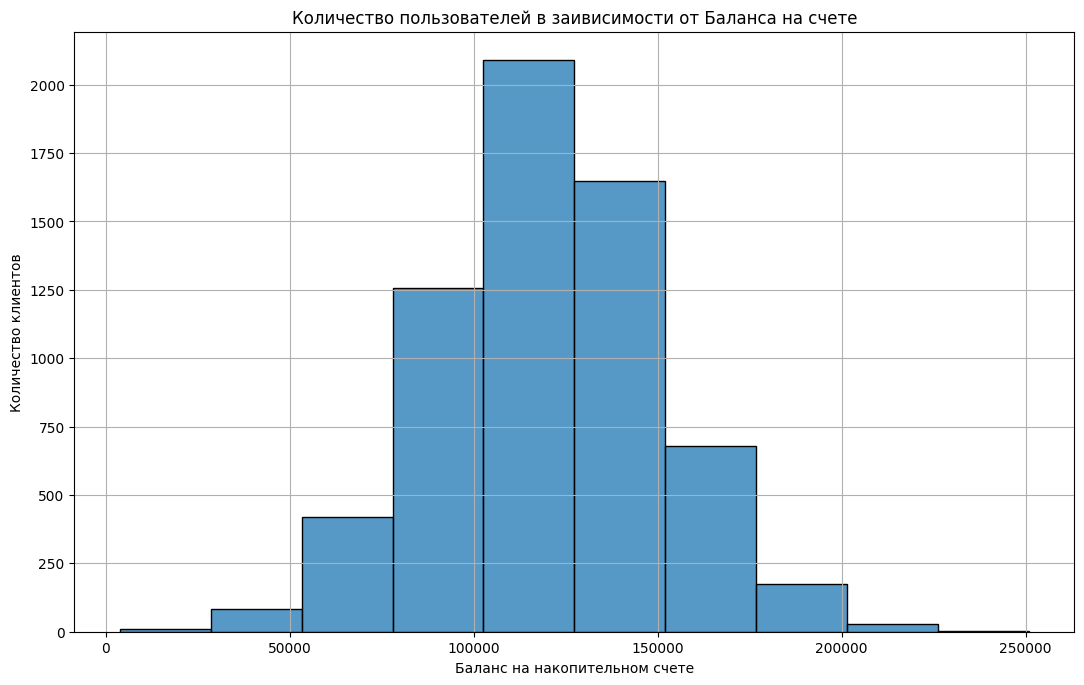

In [281]:
# Строим график sns.histplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes((1, 1, 1, 1))
sns.histplot(
    data=churn_data_balance,
    x='Balance',
    bins=10,
    
)
ax.set_title('Количество пользователей в заивисимости от Баланса на счете')
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Баланс на накопительном счете')
ax.grid()

**Вывод:** график показывает, что в основном клиенты банка имеют баланс от 75 тыс. до 175 тыс.  
Большинство количество клиентов имеют баланс в диапазоне от 100 тыс. до 125 тыс.  
Незначительное количество клиентов имеют на Балансе либо меньше 25 тыс, либо больше 225 тыс.

### Задание 9.3 ###
---

In [282]:
# Создаем 2 датафрейма: ушедших клиентов [1] и лояльных клиентов [0]
churn_data_0 = churn_data[churn_data['Exited'] == 0]
churn_data_1 = churn_data[churn_data['Exited'] == 1]

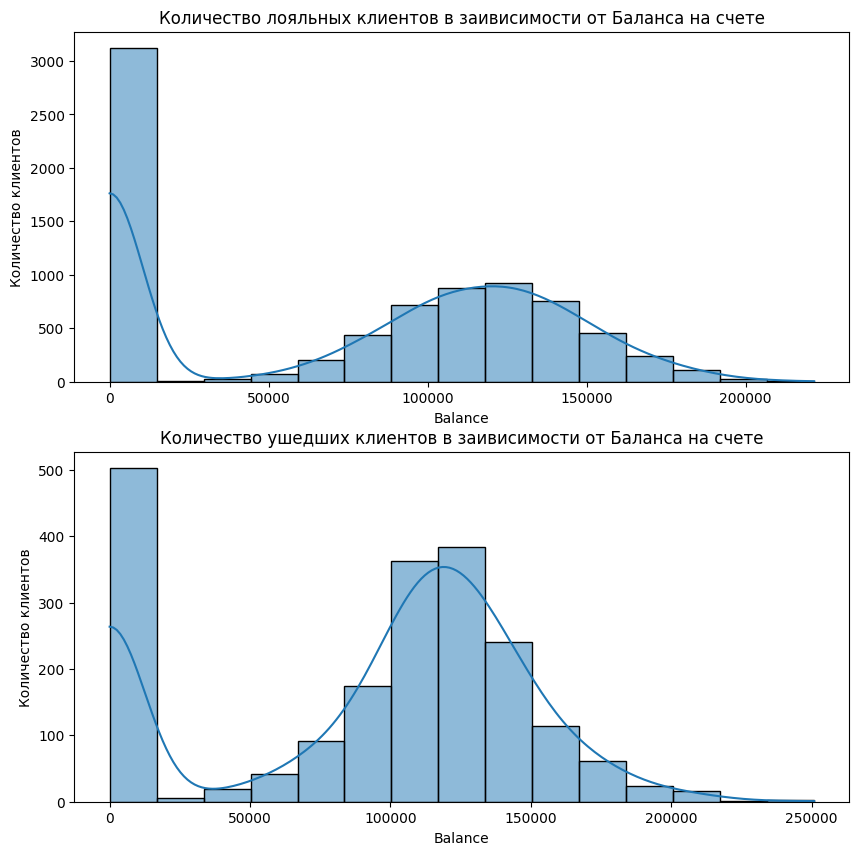

In [283]:
# Строим график sns.histplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.histplot(
    data=churn_data_0,
    x='Balance',
    bins=15,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Количество лояльных клиентов в заивисимости от Баланса на счете')
axes[0].set_ylabel('Количество клиентов')
sns.histplot(
    data=churn_data_1,
    x='Balance',
    bins=15,
    kde=True,
    ax=axes[1]
    )
axes[1].set_title('Количество ушедших клиентов в заивисимости от Баланса на счете')
axes[1].set_ylabel('Количество клиентов');

**Вывод:** на графиках видно, что у ушедших клиентов в большистве своем на накопительном счете был баланс от ~80 тыс. до ~150 тыс., то есть клиенты не были заинтересованы держать день в банке на сберегательном счете, в отличие от лояльных клиентов. Это возможно связно с тем, что у банка невыгодные условия по накопительных счетам (низкий % на остаток, невозможность снятия средств с накопительного счета, либо с потерей %). А так же наблюдается значительное количество клиентов с минимальным балансом (менее 25 тыс.), что связано скорее всего с выводом денег с накопительного счета окончанием сотрудничества с банком.

### Задание 9.4 ###
---

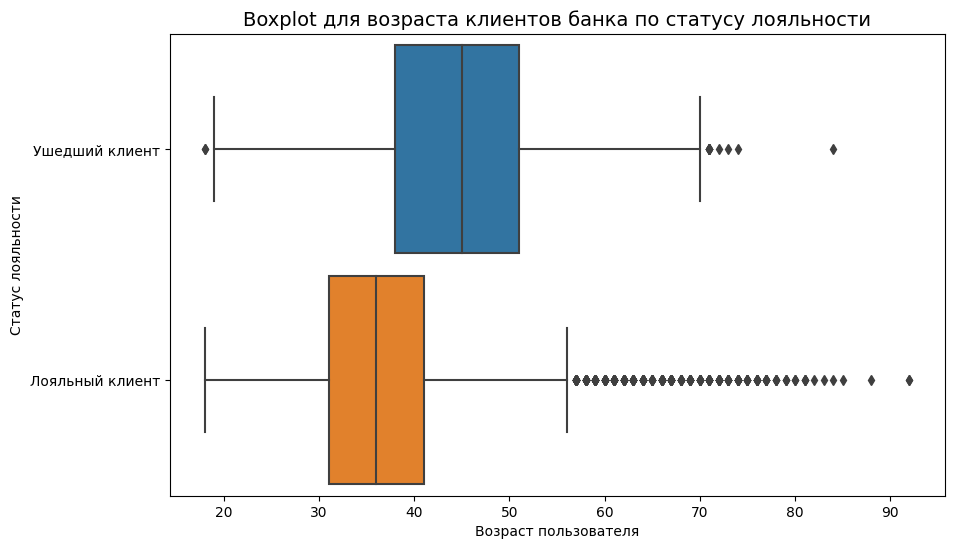

In [284]:
# Строим график sns.boxplot
fig = plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=churn_data, x='Age', y='Exited_txt', orient='h', width=0.9)
boxplot.set_title('Boxplot для возраста клиентов банка по статусу лояльности', fontsize=14)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Статус лояльности');

**Вывод:** в группе "лояльные клиенты" большее количество потенциальных выбросов, о чем показывает нижний график, на котором после 56 лет идут единичные случаи. Банку стоит обратить внимание на ушедших клиентов в возрасте 45-52 лет, в виду того, что они данный диапазон входит в квартили 50% (медианное значение) и 75%.

### Задание 9.5 ###
---

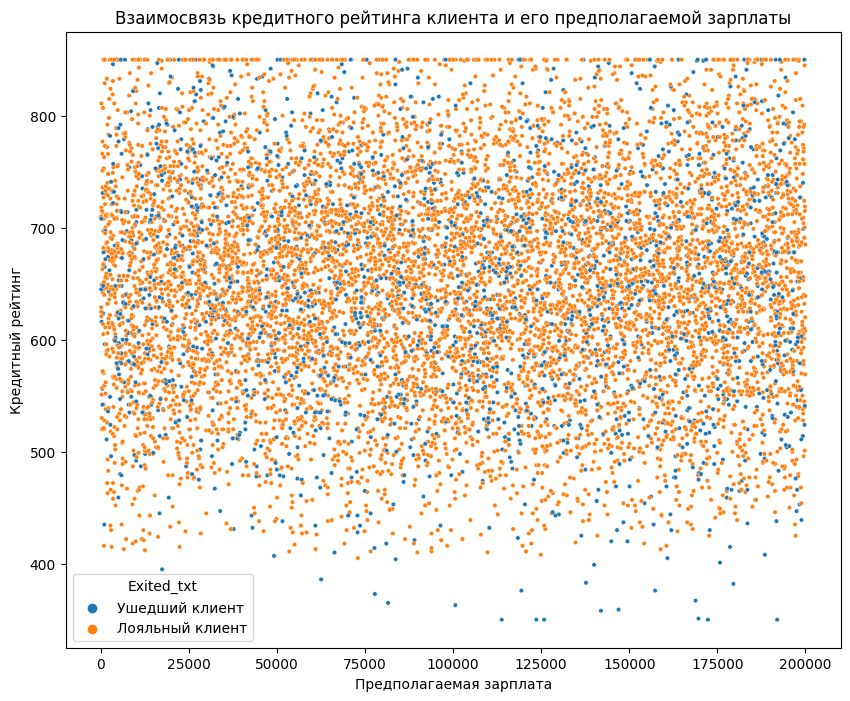

In [285]:
# Строим график sns.scatterplot
fig = plt.figure(figsize=(10, 8))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited_txt',
    s=10,
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=12)
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг');

**Вывод:** явной взаимосвязи между предполагаемой зарплатой и кредитным рейтингом не прослеживается в виду того, что для каждого уровня кредитного рейтинга наблюдается разброс разарботной платы от 0 до 250 тыс., то есть кредитный рейтинг не заивист от уровня зарплаты.

### Задание 9.6 ###
---

In [286]:
'''Сгруппируем половой признак и подсчитаем количество лояльных и ушедших
мужчин и женщин в каждой категории полового признака'''
churn_data_gender = churn_data.groupby(by=['Gender', 'Exited_txt'])['Exited'].count()
churn_data_gender

Gender  Exited_txt     
Female  Лояльный клиент    3404
        Ушедший клиент     1139
Male    Лояльный клиент    4559
        Ушедший клиент      898
Name: Exited, dtype: int64

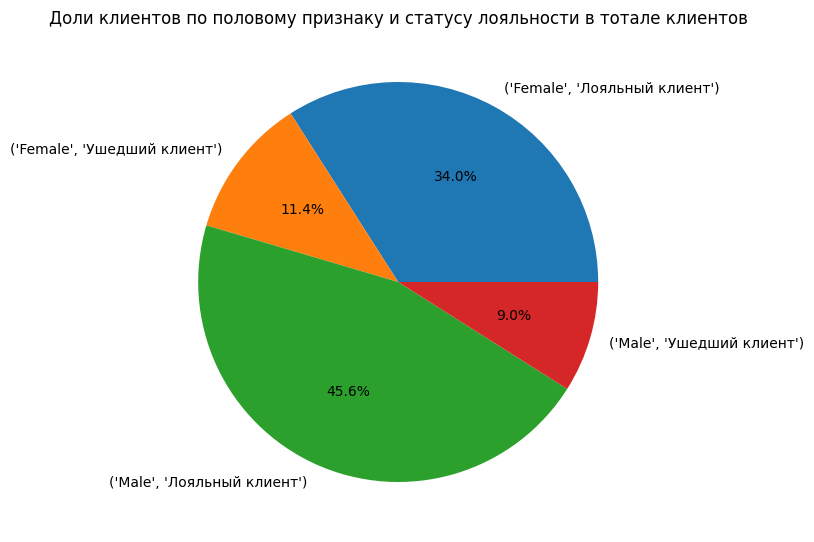

In [287]:
# Вариант графика, когда доли определеются в общем количестве клиентов без учета полового признака
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_gender,
    labels=churn_data_gender.index,
    autopct='%.1f%%'
);
title = axes.set_title('Доли клиентов по половому признаку и статусу лояльности в тотале клиентов', fontsize=12)

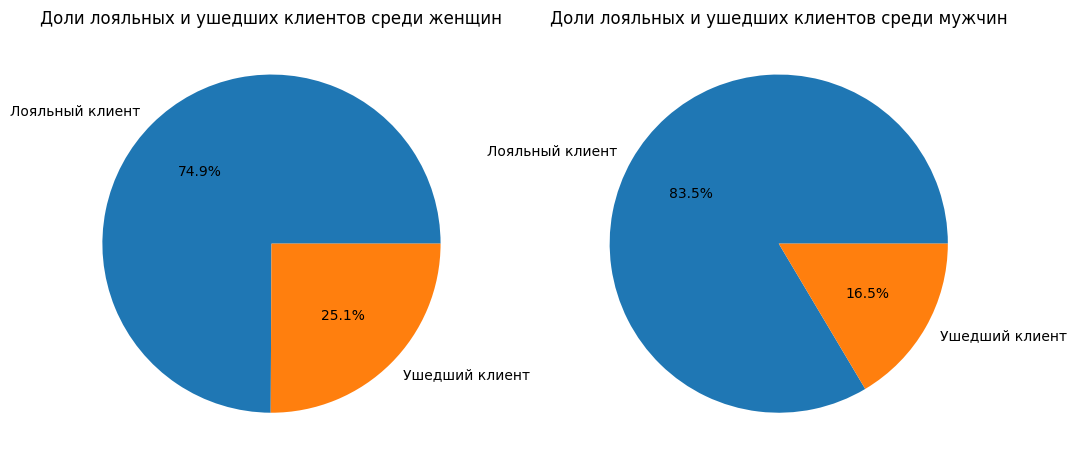

In [288]:
'''Вариант графика, когда доли определеются c учетом полового признака, 
то есть доля ушедших клиентов женского пола в общем количестве женщин (аналогично по мужчинам).'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(
    churn_data_gender.loc['Female', :],
    labels=churn_data_gender.loc['Female', :].index,
    autopct='%.1f%%'
)
axes[0].set_title('Доли лояльных и ушедших клиентов среди женщин')


axes[1].pie(
    churn_data_gender.loc['Male', :],
    labels=churn_data_gender.loc['Male', :].index,
    autopct='%.1f%%'
)

axes[1].set_title('Доли лояльных и ушедших клиентов среди мужчин');

**Вывод:** по результатам ананлиза видно, что чаще уходят женщины (11,4% от общего количества клиентов или 25,1% от числа женщин), чем мужчины.

### Задание 9.7 ###
---

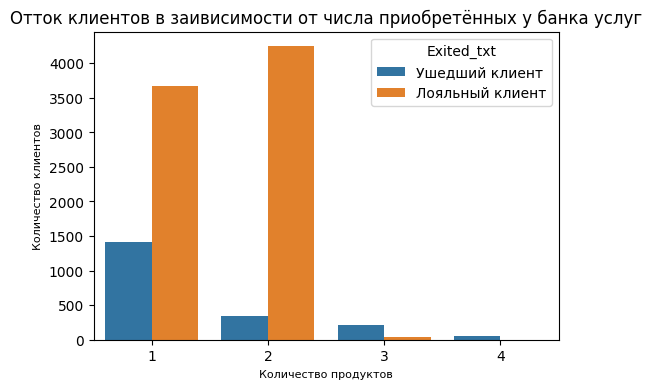

In [289]:
# Строим график sns.countplot
fig = plt.figure(figsize=(6, 4))
countplot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Exited_txt',
    )


countplot.set_title('Oтток клиентов в заивисимости от числа приобретённых у банка услуг', fontsize=12)
countplot.set_xlabel('Количество продуктов', fontsize=8)
countplot.set_ylabel('Количество клиентов', fontsize=8);

In [290]:
# Так же можно попробовать вариант через сводню таблицу и px.bar
churn_data_pivot = churn_data.pivot_table(values='CustomerId', 
                                          columns='NumOfProducts', 
                                          index='Exited_txt', 
                                          aggfunc='count')
churn_data_pivot

NumOfProducts,1,2,3,4
Exited_txt,,,,
Лояльный клиент,3675.0,4242.0,46.0,NaN
Ушедший клиент,1409.0,348.0,220.0,60.0


In [302]:
fig = px.bar(churn_data_pivot,
             y=churn_data_pivot.columns,
             orientation='v',
             height=500, 
            width=800,
            title='Oтток клиентов в заивисимости от числа приобретённых у банка услуг'
)
fig.update_layout(xaxis_title='Стаус клиента',
                  yaxis_title='Количество клиентов',
)
fig.show()
fig.write_html("data/bar_9_7_3d.html")

[Ссылка на график в формате png](https://github.com/vadimkopytko/learning/blob/main/SkillFactory/PY-13_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/data/bar_9_7_3d.png)

**Вывод:** наблюдается зависимость числа ушедших клиентов от количества банковских услуг, то есть чем меньшим количеством услуг пользуется клиенты, тем выше количество ушедших клиентов.

### Задание 9.8 ###
---

In [292]:
# Добавляем столбец с текстовым описанием типа клиента по статсу активности
churn_data['IsActiveMember_txt'] = churn_data['IsActiveMember'].apply(lambda x: 'Активный клиент' if x == 1 else 'неАктивный клиент')

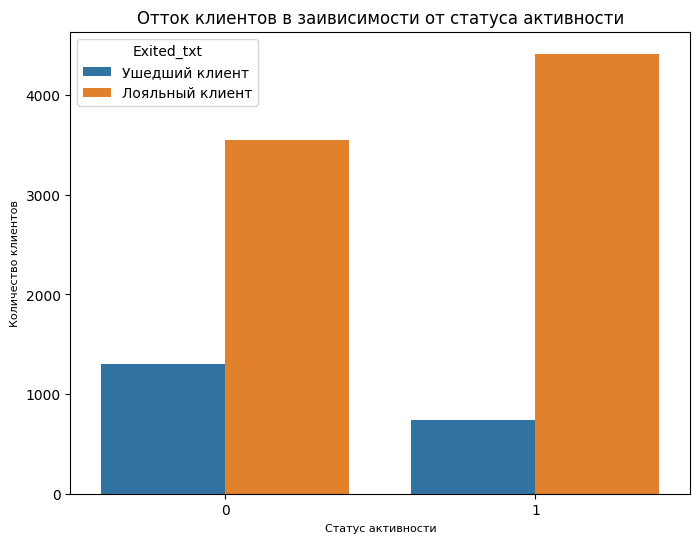

In [293]:
# Строим график sns.countplot
fig = plt.figure(figsize=(8, 6))
countplot = sns.countplot(
    data=churn_data,
    x='IsActiveMember',
    hue='Exited_txt',
    )


countplot.set_title('Oтток клиентов в заивисимости от статуса активности', fontsize=12)
countplot.set_xlabel('Статус активности', fontsize=8)
countplot.set_ylabel('Количество клиентов', fontsize=8);

In [294]:
# Так же можно попробовать вариант через сводню таблицу и px.bar
churn_data_pivot_ = churn_data.pivot_table(values='CustomerId', 
                                          columns='IsActiveMember_txt', 
                                          index='Exited_txt', 
                                          aggfunc='count')
churn_data_pivot_

IsActiveMember_txt,Активный клиент,неАктивный клиент
Exited_txt,,
Лояльный клиент,4416,3547
Ушедший клиент,735,1302


In [303]:
fig = px.bar(churn_data_pivot_,
             y=churn_data_pivot_.columns,
             orientation='v',
             height=500, 
            width=800,
            title='Oтток клиентов в заивисимости от статуса активности'
)
fig.update_layout(xaxis_title='Стаус клиента',
                  yaxis_title='Статус активности клиента',
)
fig.write_html("data/bar_9_8_3d.html")
fig.show()

[Ссылка на график в формате png](https://github.com/vadimkopytko/learning/blob/main/SkillFactory/PY-13_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/data/bar_9_8_3d.png)

**Вывод:** наблюдается зависимость числа ушедших клиентов от статуса активности клиента банка , то есть среди ушедших клиентов преобладают клиенты со статусом "неАктивного клиента". Банку следует работать в направлении привлечения клиентов выгодными банковскими продуктами, чтобы клиенты вновь стали активными, и пользовались услугами банка.

### Задание 9.9 ###
---

In [296]:
# Группируем датафрейм по признаку Страны, подсчитываем долю ушедших клиентов
churn_data_countries = round(churn_data.groupby(['Geography'])[['Exited']].mean() *100, 2)
churn_data_countries


,Exited
Geography,
France,16.15
Germany,32.44
Spain,16.67


In [304]:
# Строим график px.choropleth
fig = px.choropleth(
    data_frame=churn_data_countries, 
    locations=churn_data_countries.index,
    locationmode = 'country names',
    color='Exited',
    range_color=[0, 35],
    title='Распределение доли ушедших клиентов по странам мира',
    width=800,
    height=500,
    color_continuous_scale='YlGnBu' 
)
fig.write_html("data/choropleth_9_9_3d.html")
fig.show()

[Ссылка на график в формате png](https://github.com/vadimkopytko/learning/blob/main/SkillFactory/PY-13_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/data/choropleth_9_9_3d.png)

**Вывод:** согласно графику, клиенты банка распредены в 3 странах мира: Испания, Франция и Германия. Наибольшая доля ушедших клиентов наблюдается в Германии (32,44%). Скорее всего это связано с тем, что среди этих 3 стран, численность насления в Германии - наибольшая, поэтому если пересчитать число ушедших клиентов на 1 000 жителей для каждой из стран, то возможно результаты будут иными.

### Задание 9.10 ###
---

In [298]:
# Создадим функцию, которая присвоит каждому клиенту банка тип по кредитному рейтингу по диапазонам
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [299]:
# Применим функцию к столбцу CreditScore таблицы 
churn_data['CreditScoreCategory'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCategory'].value_counts()

Good         3703
Poor         2434
Fair         2281
Excellent     950
Very_Poor     632
Name: CreditScoreCategory, dtype: int64

In [300]:
# Создаем сводную таблицу со строками - категории кредитного рейтинга (CreditScoreCat)
# и столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
churn_data_creditscore = churn_data.pivot_table(
    values='Exited', 
    columns='Tenure', 
    index='CreditScoreCategory',
    aggfunc='mean'
)

churn_data_creditscore

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCategory,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


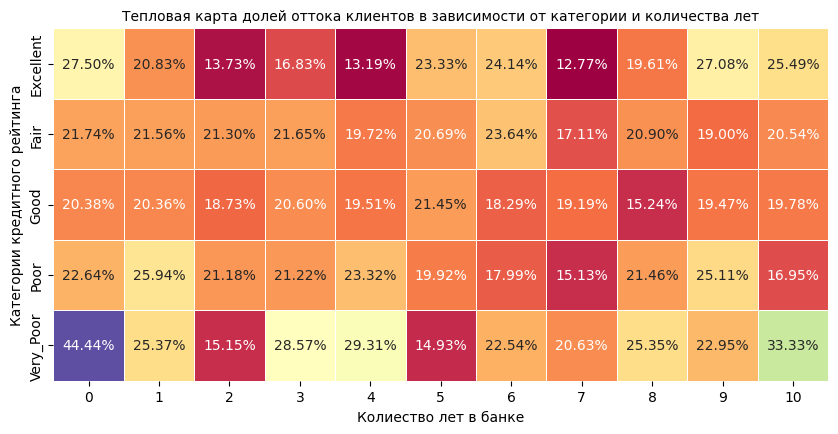

In [301]:
fig = plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    data=churn_data_creditscore, 
    cmap='Spectral',
    linewidths=.5,
    annot=True,
    cbar=False,
    square=True,
    fmt = '.2%')
heatmap.set_title('Тепловая карта долей оттока клиентов в зависимости от категории и количества лет', fontsize=10)
heatmap.set_xlabel('Колиество лет в банке')
heatmap.set_ylabel('Категории кредитного рейтинга');


**Вывод:** по итогам анализа графика можно сделать вывод,что наибельшее доля клиентов (44,44%), уходящих из банка - это новички, которые работают с банком менее 1 года и имеют кредитный рейтинг 'Very Poor'. Второе место (33,33%) занимают клиенты, которые находятся в банке 10 лет и так же имеют кредитный рейтинг 'Very Poor'.